# 9week - CNN
## Tobigs assignment / lee hye min

# 1. review

In [39]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving cnn.PNG to cnn.PNG
Saving convolution.png to convolution.png
Saving pooling.png to pooling.png
User uploaded file "cnn.PNG" with length 319385 bytes
User uploaded file "convolution.png" with length 55409 bytes
User uploaded file "pooling.png" with length 84955 bytes


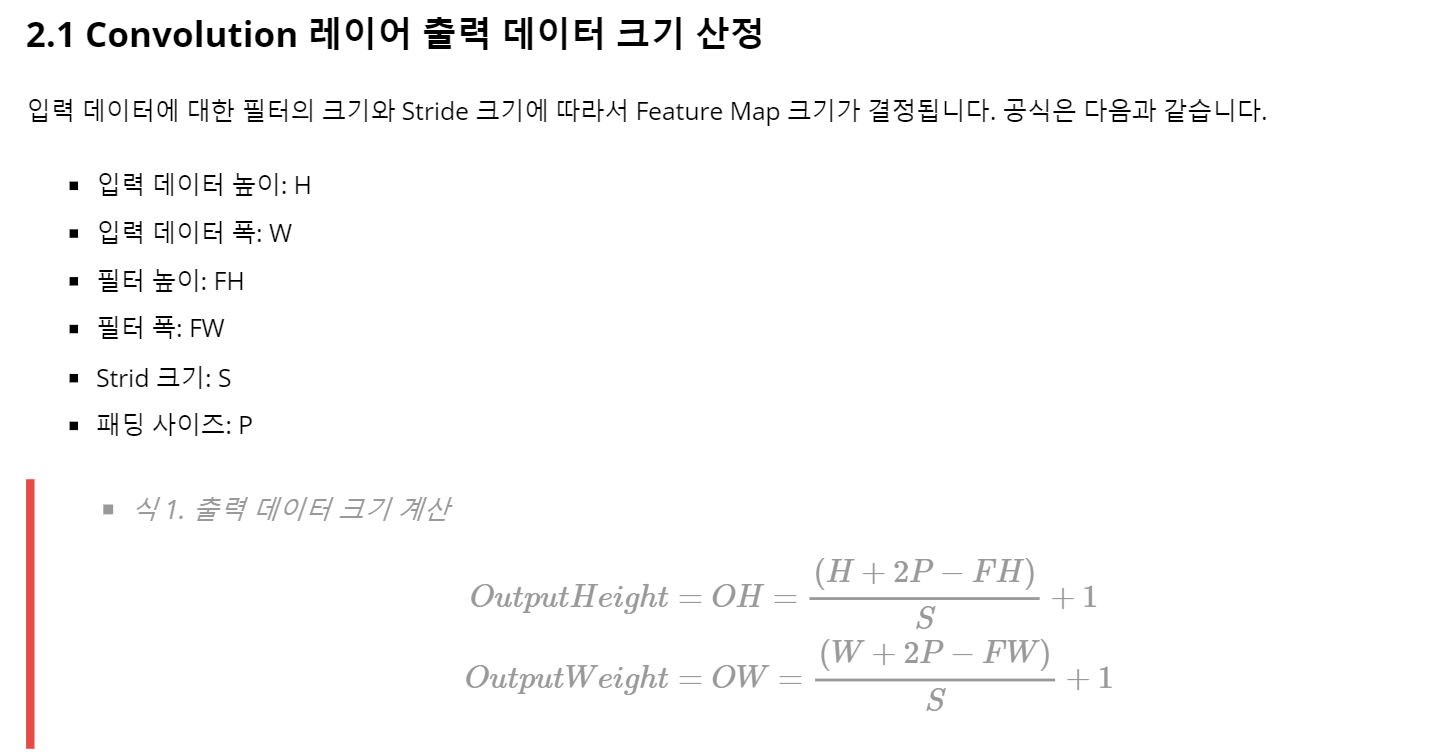

In [40]:
from IPython.display import Image
Image('convolution.png')

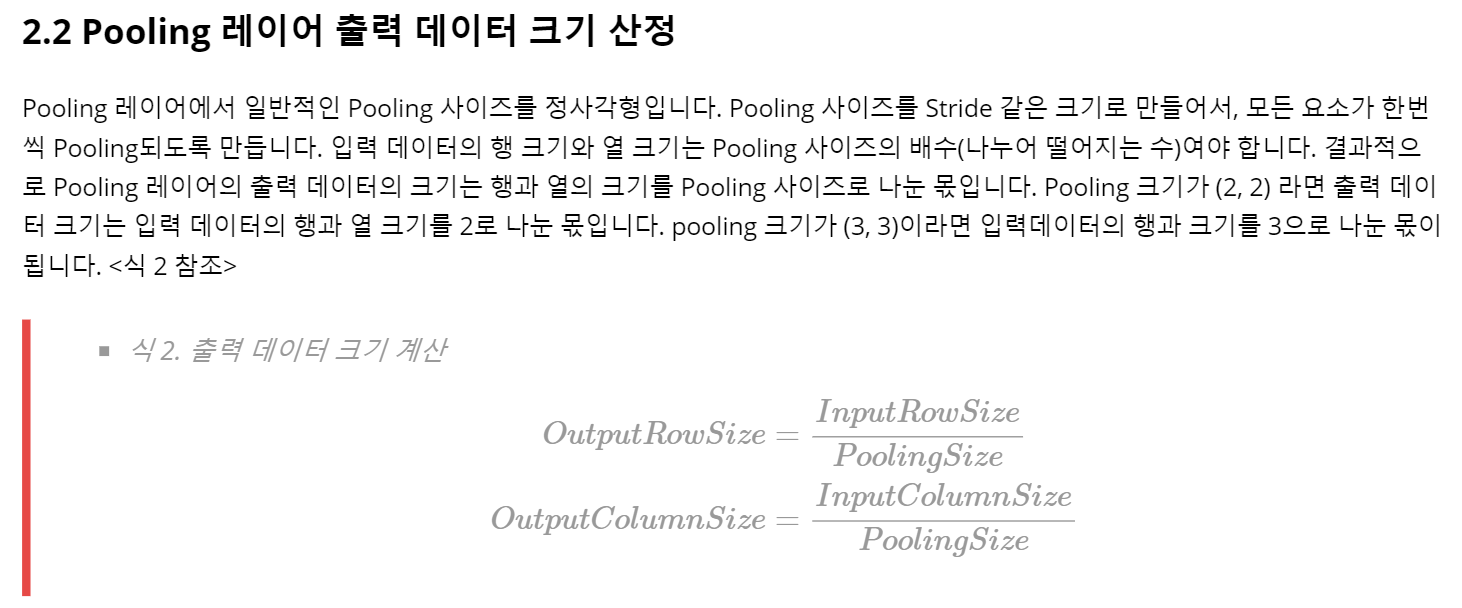

In [42]:
from IPython.display import Image
Image('pooling.png')

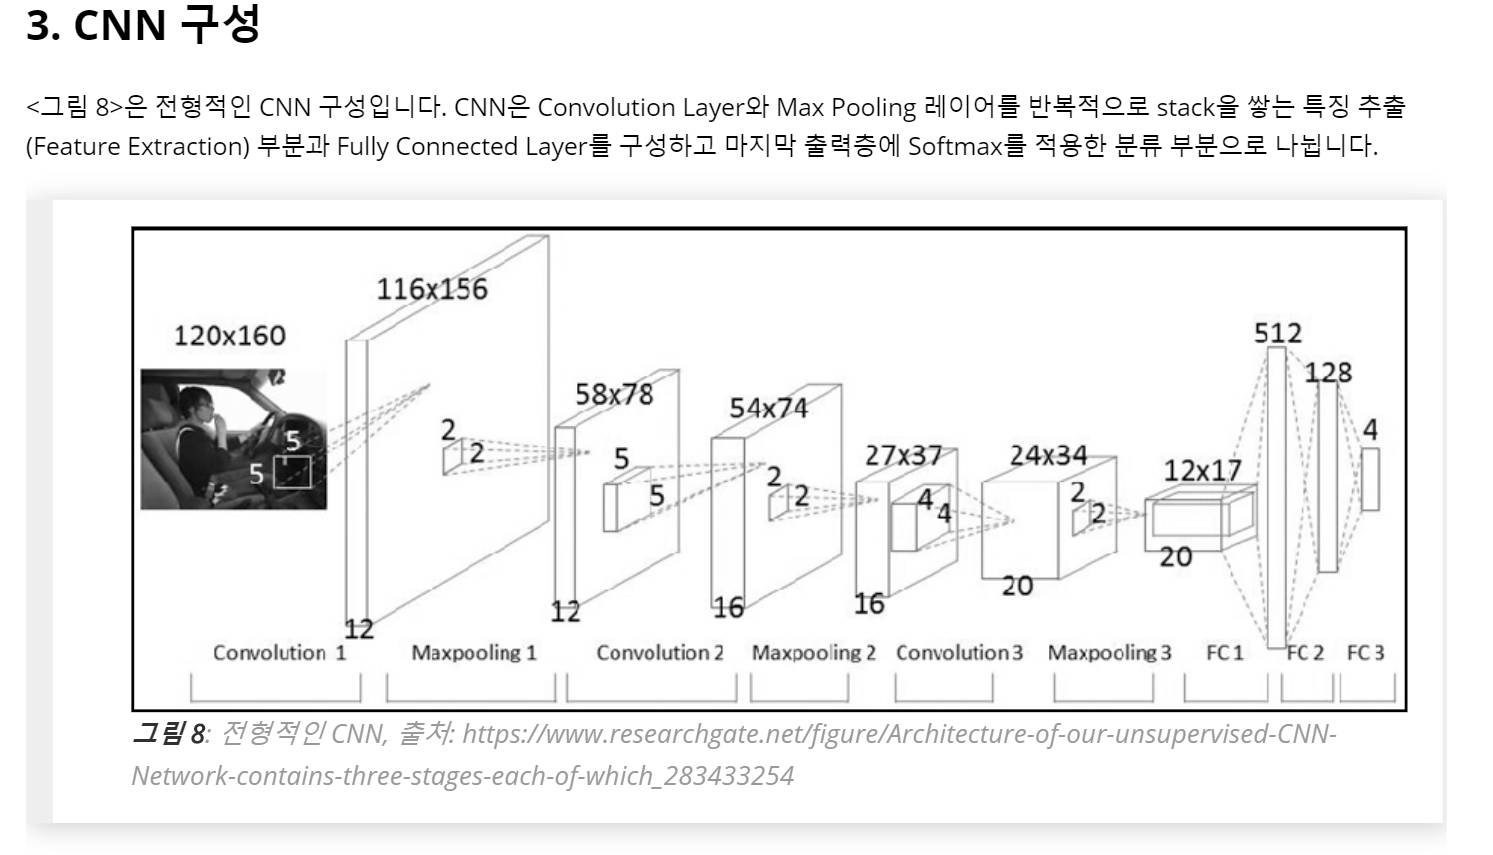

In [44]:
Image('cnn.PNG')

#2. assignment

# AlexNet

- [paper](http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf)

- [imagenet data(2012)](http://image-net.org/challenges/LSVRC/2012/index#task)

- [code](https://pytorch.org/docs/0.4.0/_modules/torchvision/models/alexnet.html)

- Model architecture
![model_architecture](https://cv-tricks.com/wp-content/uploads/2017/03/xalexnet_small-1.png.pagespeed.ic.u_mv-jhXMI.webp)

### Naive Version
CONV_1 - POOL_1 - CONV_2 - POOL_2 - CONV_3 - CONV_4 - CONV_5 - POOL_3 - FC1 - FC2 - FC3 (->SOFTMAX)

In [15]:
# 모듈 불러오기
!pip install keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Lambda


In [0]:
class LocalResponseNormalization(Layer):

    def __init__(self, n=5, alpha=1e-4, beta=0.75, k=2, **kwargs):
        self.n = n
        self.alpha = alpha
        self.beta = beta
        self.k = k
        super(LocalResponseNormalization, self).__init__(**kwargs)

    def build(self, input_shape):
        self.shape = input_shape
        super(LocalResponseNormalization, self).build(input_shape)

    def call(self, x):
        _, r, c, f = self.shape 
        squared = K.square(x)
        pooled = K.pool2d(squared, (self.n, self.n), strides=(1,1), padding="same", pool_mode='avg')
        summed = K.sum(pooled, axis=3, keepdims=True)
        averaged = self.alpha * K.repeat_elements(summed, f, axis=3)
        denom = K.pow(self.k + averaged, self.beta)
        return x / denom 
    
    def compute_output_shape(self, input_shape):
        return input_shape 

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Lambda
from keras.regularizers import l2
from keras import backend as K
from keras import optimizers
from keras.engine.topology import Layer
input_shape = (227, 227, 3)

model = Sequential()
model.add(Conv2D(96, (11, 11), strides=4,
                 padding='same', input_shape=input_shape))
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(LocalResponseNormalization(input_shape=model.output_shape[1:]))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
model.add(LocalResponseNormalization(input_shape=model.output_shape[1:]))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
optimizer = optimizers.SGD(lr=0.01, decay=5e-5, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])
model.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 57, 57, 96)        34944     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 57, 57, 256)       614656    
_________________________________________________________________
local_response_normalization (None, 57, 57, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 384)       885120    
_________________________________________________________________
local_response_normalization (None, 28, 28, 384)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 384)    

### detailed
CONV_1(ReLU) - POOL_1 - CONV_2(ReLU) - POOL_2 - CONV_3(ReLU) - CONV_4(ReLU) - CONV_5(ReLU) - POOL_3 -(Flatten) FC1(ReLU) - FC2(ReLU) - FC3(->SOFTMAX)

# Q.1 fill in the '????' & 'TODO'

### Layer 1 is a Convolution Layer_1

- **Input Image size**     224 x 224 x 3 -> 227 x 227 x 3

- **Number of filters**   96

- **Filter size** 11 x 11 x 3

- **Stride** 4

- **Layer 1 Output**  55 x 55 x 96 (because of stride 4)




In [2]:
##OutPut 배열 값

(227-11)/4 + 1    #227은 H+2P -> 224(H)+2P 

55.0

In [3]:
## TODO ##

#########################a#############################
#  Calculate the number of parameters in this layer  #
######################################################

Conv_1 = (11*11*3) * 96 + 96 #( filter size * filter num ) + bias

Conv_1

34944

### Layer 2 is a Max Pooling_1 Followed by Convolution_1

- **Input**  55 x 55 x 96

- **Max pooling**  

- **Pooling size**(overlapping) 3 x 3

- **Stride** 2

- **Layer 2 Output** 27 x 27 x 96


In [0]:
## TODO 

######################################################
#  Calculate the number of parameters in this layer  #
######################################################

Max_pool_1 = 0

### Layer 3 is a a Convolution Layer_2

- **Input**  27 x 27 x 96

- **Number of filters**  256

- **Filter size**  5 x 5 x 96 

- **Stride** 1

- **padding** 2

- **Layer 3 Output** 27 x 27 x 256


In [0]:
## TODO 

######################################################
#  Calculate the number of parameters in this layer  #
######################################################

Conv_2 = (5 * 5 * 96)*256 + 256

### Layer 4 is a Max Pooling_2 Followed by Convolution_2

- **Input**  27 x 27 x 256

- **Max pooling**  

- **Pooling size**(overlapping) 3 x 3

- **Stride** 2

- **Layer 4 Output** 13 x 13 x 256

In [0]:
## TODO 

######################################################
#  Calculate the number of parameters in this layer  #
######################################################

Max_pool_2 = 0

### Layer 5 is a a Convolution Layer_3

- **Input**  13 x 13 x 256

- **Number of filters**  384

- **Filter size**  3 x 3 x 256

- **Stride** 1

- **padding** 2

- **Layer 5 Output** 13 x 13 x 384


In [0]:
## TODO 

######################################################
#  Calculate the number of parameters in this layer  #
######################################################
Conv_3 = (3* 3* 256)*384 + 384

### Layer 6 is  a Convolution Layer_4

- **Input**  13 x 13 x 384

- **Number of filters**  384

- **Filter size**  3 x 3 x 384

- **Stride** 1

- **padding** 1

- **Layer 6 Output** 13 x 13 x 384

In [0]:
## TODO 

######################################################
#  Calculate the number of parameters in this layer  #
######################################################
Conv_4 = (3 * 3 * 384) * 384 + 384

### Layer 7 is a Convolution Layer_5

- **Input**  13 x 13 x 384

- **Number of filters**  256

- **Filter size**  3 x 3 x 384

- **Stride** 1

- **padding** 1

- **Layer 7 Output** 13 x 13 x 256

In [0]:
## TODO 

######################################################
#  Calculate the number of parameters in this layer  #
######################################################
Conv_5 = (3 * 3 * 384)*256 + 256

### Layer 8 is a Max Pooling_3 Followed by Convolution_5

- **Input**  13 x 13 x 256

- **Max pooling**  

- **Pooling size**(overlapping) 3 x 3

- **Stride** 2

- **Layer 8 Output** 6 x 6 x 256

In [0]:
## TODO 

######################################################
#  Calculate the number of parameters in this layer  #
######################################################

Max_pool_3 = 0

### Layer 9 is a Fully_Connected layer_1

- **input** 6 x 6 x 256

- **flatten** 4096

- **output size** (N,flatten) x (flatten,4096)

- **N** Number of input data

In [0]:
## TODO 

######################################################
#  Calculate the number of parameters in this layer  #
######################################################
FC1 = (6*6*256)*4096 + 4096

### Layer 10 is a Fully_Connected layer_2

- **input** (N,4096)

- **output size** (N,4096) x (4096,4096)

- **N** Number of input data 6

In [0]:
## TODO 

######################################################
#  Calculate the number of parameters in this layer  #
######################################################

FC2 = (4096 * 4096) + 4096

### Layer 11 is a Fully_Connected layer_3

- **input** (N,4096)

- **output size** (N,4096) x (4096,Num_classes)

- **N** Number of input data

- **Num_classes** Number of labels

In [0]:
## TODO 

######################################################
#  Calculate the number of parameters in this layer  #
######################################################

FC3 = 4096 * 1000 + 4096